# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

W mieście liczącym 700 000 mieszkańców pojawiła się choroba, na którą choruje 1 osoba na 1000. Nie wiadomo, które osoby są chore, ale dostępny jest test diagnostyczny, którego zarówno czułość i swoistość wynosi 99% (tzn. prawdopodobieństwo uzyskania poprawnego wyniku – zarówno pozytywnego u osoby chorej, jak i negatywnego u osoby zdrowej – wynosi 99%).
Jakie jest prawdopodobieństwo, że pacjent, który otrzymał pozytywny wynik testu jest rzeczywiście chory?

#### A)

Przeprowadź symulację komputerową opisanego scenariusza:

- Utwórz listę mieszkańców o wielkości 700 tys. elementów, gdzie każdy element reprezentuje mieszkańca. Każdy mieszkaniec powinien posiadać dwie właściwości: *stan zdrowia* (zdrowy/chory) oraz *wynik diagnozy* (pozytywny/negatywny).
- Losowo wybieramy 700 mieszkańców (bo 1 na 1000 osób choruje) i przypisz im *stan zdrowia* jako *chory*. Uwaga: należy dopilnować, aby nie wylosowała się dwukrotnie ta sama osoba.
- Spośród osób chorych wylosuj 1% i przypisz im błędny wynik testu (*wynik diagnozy* = negatywny). Spośród osób zdrowych wylosuj 1% i przypisz im błędny wynik testu (*wynik diagnozy* = pozytywny).
- Korzystając z utworzonej listy mieszkańców, oblicz prawdopodobieństwo, że osoba z pozytywnym wynikiem testu jest rzeczywiście chora, według wzoru: `liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`.

In [1]:
#1.1.1.1. A)
import numpy as np
import random
import time

start = time.time()
#Poki co wszyscy są zdrowi i wszyscy sa sklasyfikowani jako zdrowi (0,0)
samples = 700000
data = 2
columns = ["Stan zdrowia", "Diagnoza"]
citizens = np.empty(shape = (samples,data))

#Losowo wybieramy 700 mieszkańców (bo 1 na 1000 osób choruje) 
#i przypisz im stan zdrowia jako chory. Uwaga: należy dopilnować, aby nie wylosowała się dwukrotnie ta sama osoba.

sick = random.sample(range(samples), 700)
print("Liczba unikalnych wylosowanych pacjentow: ",len(np.unique(sick)))
citizens[sick,0] = 1
citizens[sick,1] = 1


#Spośród osób chorych wylosuj 1% i przypisz im błędny wynik testu (wynik diagnozy = negatywny).
#Spośród osób zdrowych wylosuj 1% i przypisz im błędny wynik testu (wynik diagnozy = pozytywny).
sick_bad_diagnosis = random.sample(sick, 7)

#Wszystkie osoby w mieście
all_people = list(range(samples))
#Zdrowi to ci, których nie ma na liście sick
healthy = [i for i in all_people if i not in sick]
 
healthy_bad_diagnosis = random.sample(healthy, 6993)

#Przypisanie
citizens[sick_bad_diagnosis,1] = 0
citizens[healthy_bad_diagnosis,1] = 1


mask_tp = (citizens[:, 0] == 1) & (citizens[:, 1] == 1)
tp = len(citizens[mask_tp])

positive = len(citizens[citizens[:,1] == 1])

precision = tp/(positive)
end = time.time()


print("Prawdopodobienstwo / precyzja: ", round(precision*100,6), "%")
print(f"Czas wykonania: {end - start:.6f} s")

Liczba unikalnych wylosowanych pacjentow:  700
Prawdopodobienstwo / precyzja:  9.016393 %
Czas wykonania: 3.965411 s


#### B)

Napisz funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Następnie zmierz i porównaj czas wykonania obliczeń w obu przypadkach: symulacji komputerowej oraz wzoru Bayesa.




In [2]:
# Bayess
start = time.time()
recall = 0.99
specificity = 0.99
#Czestosc wystepowania
preval = 1/1000

probability = (recall * preval) / ((recall*preval) + (1-specificity) * (1-preval))
end = time.time()
print("Prawdopodobienstwo / precyzja: ", round(probability*100,6), "%")
print(f"Czas wykonania: {end - start:.10f} s")

Prawdopodobienstwo / precyzja:  9.016393 %
Czas wykonania: 0.0000000000 s


#### C)

Wyświetl wykres, gdzie na osi X znajduje się czułość i swoistość testu (przyjmij zakres 50%-99.99%), a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_ (użyj funkcji z podpunktu B).

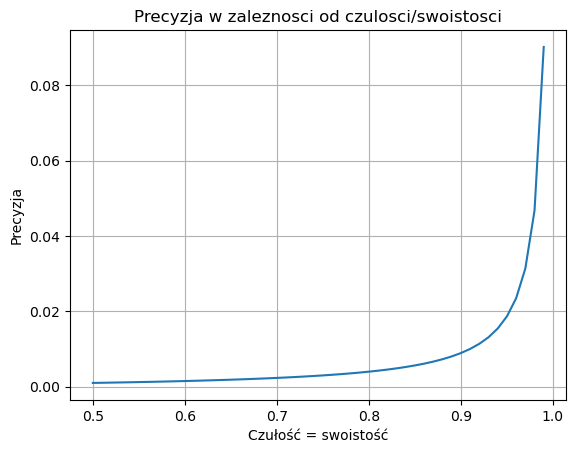

In [3]:
import matplotlib.pyplot as plt
preval = 1/1000
spec_range = np.arange(0.5, 0.9999, 0.01)
recall_range = np.arange(0.5, 0.9999, 0.01)

prob = (recall_range * preval) / ((recall_range*preval) + (1-spec_range) * (1-preval))


plt.figure()
plt.plot(recall_range, prob)
plt.title("Precyzja w zaleznosci od czulosci/swoistosci")
plt.xlabel("Czułość = swoistość")
plt.ylabel("Precyzja")
plt.grid()


### Zadanie 2

Sprawdź (symulacją) ile średnio razy należy losować 13 kart, aby trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze. Możemy to zrobić następująco: losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w którymkolwiek kolorze dostaniemy $\ge 8$ kart, zapisujemy liczbę przeprowadzonych losowań i podejmujemy kolejną próbę. Przeprowadź 1000 takich prób i oblicz średnią liczbę losowań. 

Dodatkowo wypisz jedną (np. ostatnią) wylosowaną "rękę".

In [4]:
oznaczenia = {1: 'Serce', 2: 'Wino', 3: 'Dzwonek', 4: 'Żołądź'}
#Tworzenie pseudo-talii (tylko kolory)
karty = np.repeat([1, 2, 3, 4], 13)
#Tasowanie
np.random.shuffle(karty)

karty = karty.tolist()

#Losowanie
c_avg = []
for n in range(1000):
    c = 0
    succes = False
    while not succes:
        c+=1
        reka = random.sample(karty, 13)
        colors, number = np.unique(reka, return_counts = True)
        for n in number:
            if n>=8:
                succes = True

    ###
    c_avg.append(c)


print("Srednia liczba losowan: ", int(round(np.mean(c_avg),0)))
print("Przykładowa ręka: ", [oznaczenia[kolor] for kolor in reka])
    
    
    
    

Srednia liczba losowan:  203
Przykładowa ręka:  ['Wino', 'Żołądź', 'Serce', 'Wino', 'Wino', 'Żołądź', 'Wino', 'Wino', 'Żołądź', 'Wino', 'Wino', 'Wino', 'Dzwonek']
